# Тема “Обучение с учителем”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
boston = load_boston()
data = boston['data']
feature_names = boston["feature_names"]
x = pd.DataFrame(data, columns=feature_names)
x.head()
target = boston['target']
y = pd.DataFrame(target, columns=['price'])
x
#y.head()
#y.info()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [3]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train_scaled.describe().round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.5,-0.3,-1.5,-3.5,-2.3,-1.3,-1.0,-1.3,-2.6,-3.9,-1.5
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.8,-0.8,-0.6,-0.8,-0.7,0.2,-0.8
50%,-0.4,-0.5,-0.4,-0.3,-0.2,-0.1,0.3,-0.3,-0.5,-0.4,0.2,0.4,-0.2
75%,-0.0,0.4,1.0,-0.3,0.6,0.5,0.9,0.7,0.3,1.6,0.8,0.4,0.6
max,9.6,3.8,2.4,3.6,2.7,3.5,1.1,3.9,1.7,1.8,1.7,0.4,3.6


Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [4]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)

print(f'До:\t{x_train_scaled.shape}')
print(f'После:\t{x_train_tsne.shape}')


До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

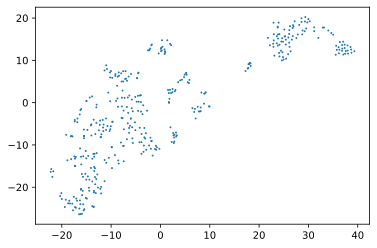

In [5]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], s=1)
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [6]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [7]:
train_labels = model.fit_predict(x_train_scaled)
train_labels

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0,

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

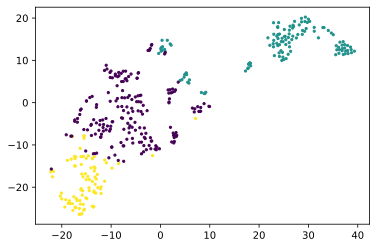

In [20]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_labels, s=5);

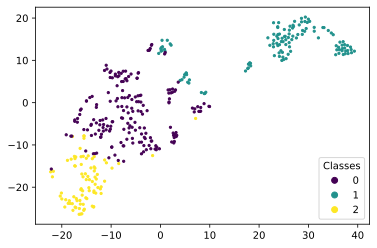

In [29]:
fig, ax = plt.subplots()
scatter = ax.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_labels, s=5);
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [9]:
for i in range(3):
    print(f'Cluster {i}: mean price = {y_train[train_labels == i].mean().values}')
    print(f'Cluster {i}: mean CRIM = {x_train.loc[train_labels == i, "CRIM"].mean()}')

Cluster 0: mean price = [24.95811518]
Cluster 0: mean CRIM = 0.42166020942408367
Cluster 1: mean price = [16.16535433]
Cluster 1: mean CRIM = 10.797028425196853
Cluster 2: mean price = [27.78837209]
Cluster 2: mean CRIM = 0.07356558139534886


## * Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [10]:
test_labels = model.fit_predict(x_test_scaled)
test_labels

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [11]:
for i in range(3):
    print(f'Cluster {i}: mean price = {y_test[test_labels == i].mean().values}')
    print(f'Cluster {i}: mean CRIM = {x_test.loc[test_labels == i, "CRIM"].mean()}')

Cluster 0: mean price = [16.71052632]
Cluster 0: mean CRIM = 9.419181842105264
Cluster 1: mean price = [22.69090909]
Cluster 1: mean CRIM = 0.21929690909090907
Cluster 2: mean price = [34.31111111]
Cluster 2: mean CRIM = 0.04070333333333334
